<p></p>

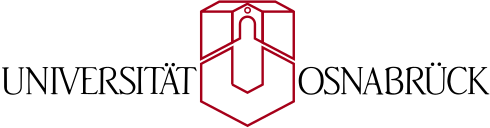
# <center>Einführung in die Künstliche Intelligenz</center> <a class="tocSkip">
### <center>Wintersemester 2020/21</center> <a class="tocSkip">
<center>Prof. Dr. Joachim Hertzberg, Felix Igelbrink, Alexander Mock</center>

# Übungsblatt 9: Markov Entscheidungsprobleme

## Aufgabe: MDPs


<div>
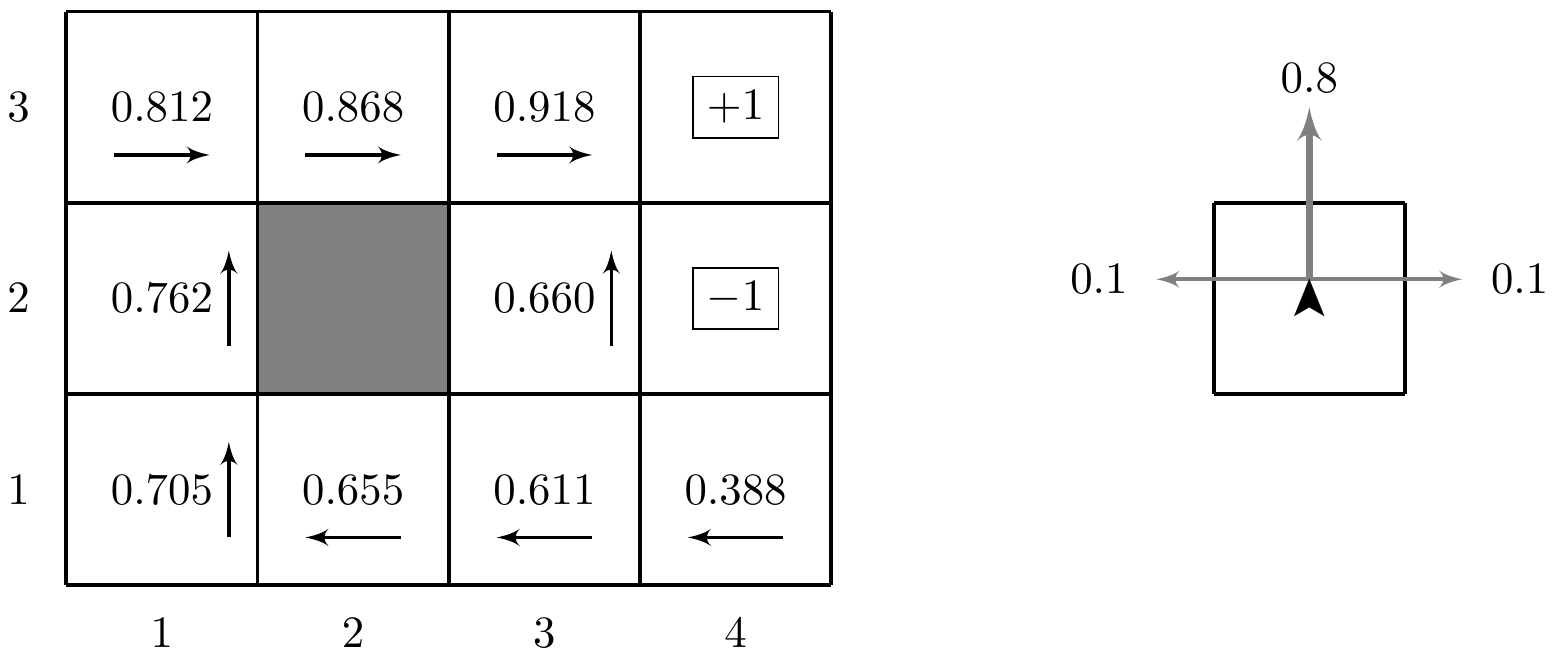 
</div>

In der Vorlesung haben Sie das 12-Felder-Spielbrett als Beispiel-Umgebung für die Betrachtung von Handlungssequenzen unter Unsicherheit kennengelernt.
Terminalzustände sind hier mit ihrem Reward in einem Kasten gekennzeichnet, das Feld $(2,2)$ ist nicht traversierbar.
Die eingetragenen Pfeile und Utilities stammen von Folie 272.
Die schwarze Pfeilspitze der Transitionsfunktion gibt die Richtung der Aktion an, die grauen Pfeile die Richtungen der möglichen Resultate.
An den grauen Pfeilen sind jeweils die Wahrscheinlichkeiten für ihren Eintritt notiert.
Würde ein Zug zum Verlassen der $4 \times 3$ Umgebung führen, so wird mit der entsprechenden Wahrscheinlichkeit auf dem Ausgangsfeld verweilt.

### 

Die Beispiel-Policy auf Folie 272 gibt als empfohlenen Zug für Feld $(3,1)$ an, nach links zu gehen.
Zum gewünschten Zielfeld $(4, 3)$ führt das offensichtlich auf einen Umweg.
Erklären Sie, warum dieser Zug trotzdem besser ist als der, von $(3, 1)$ direkt auf kurzem Weg nach oben zu ziehen, obwohl die Utility in $(3, 2)$ größer ist als in $(2, 1)$.
Argumentieren Sie kurz, warum das intuitiv sinnvoll ist; argumentieren Sie dann quantitativ über die entsprechende Policy im zugehörigen MDP und gehen dabei näherungsweise von den Zustandsnutzen-Werten auf Folie 283 aus.

YOUR ANSWER HERE

### 

Geben Sie eine Policy an, bei der Sie so wenig Änderungen wie möglich an der Beispiel-Policy von Folie 283 vornehmen, die garantiert, dass man nicht in dem Terminalzustand mit dem negativen Reward landet.
    Wieviele Utilities müssen nach diesem Eingriff in die Policy neu berechnet werden?
    Was müsste an dem ursprünglichen Problem geändert werden, damit eine solche Policy optimal wird?

YOUR ANSWER HERE
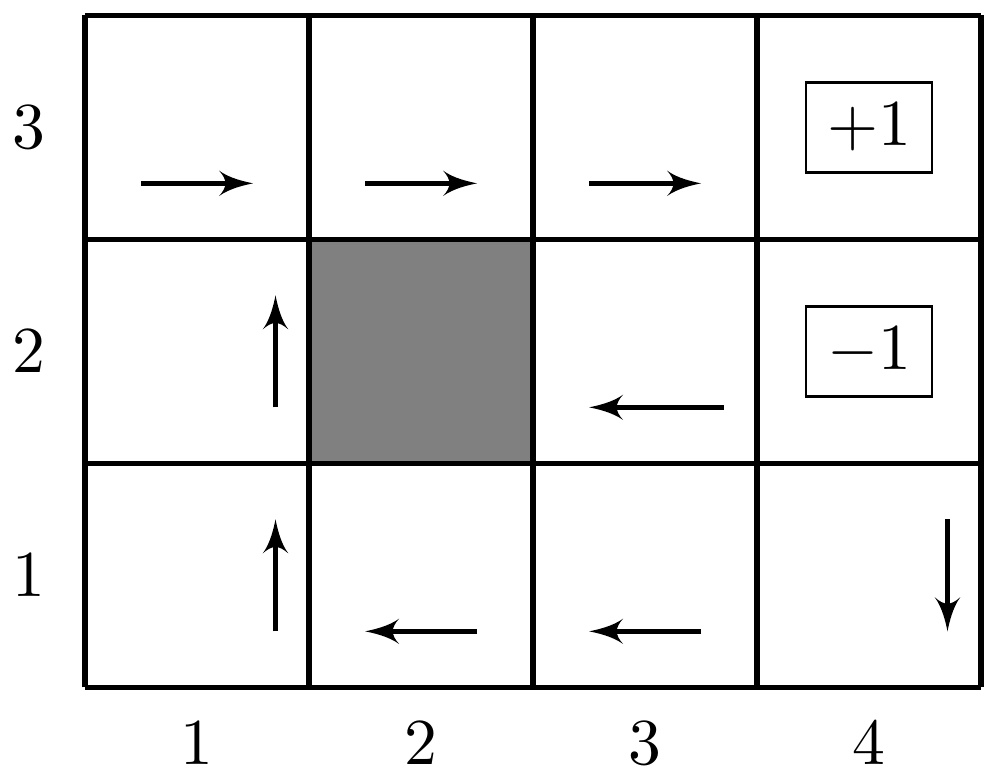

### 

Geben Sie (beginnend mit der Initialisierung aller Utilities auf $0$) die ersten 4 Schritte von *Value-Iteration* für die $4 \times 3$ Umgebung an.
    Gehen Sie dabei, wie auf den Vorlesungsfolien von $\gamma = 1$ und einem Reward für nichtterminale Zustände $s$ von $R(s)= -0.04$ aus.
    Geben Sie zusätzlich in jedem Schritt für jedes Feld $(x, y)$ an, welche Aktion $a$ zur Berechnung der Utilities angewendet wurde, d.h. halten Sie jeweils die zu einem berechneten Zeitpunkt benutzte Policy fest.

*Hinweis*: Die Aktion $a$ muss nicht eindeutig sein, gegebenenfalls ergibt sich auch eine Menge von Aktionen, die alle die gleiche Utility erzeugen.
    In diesem Fall geben Sie die Menge der Aktionen an, die alle die gleiche Utility liefern.


YOUR ANSWER HERE
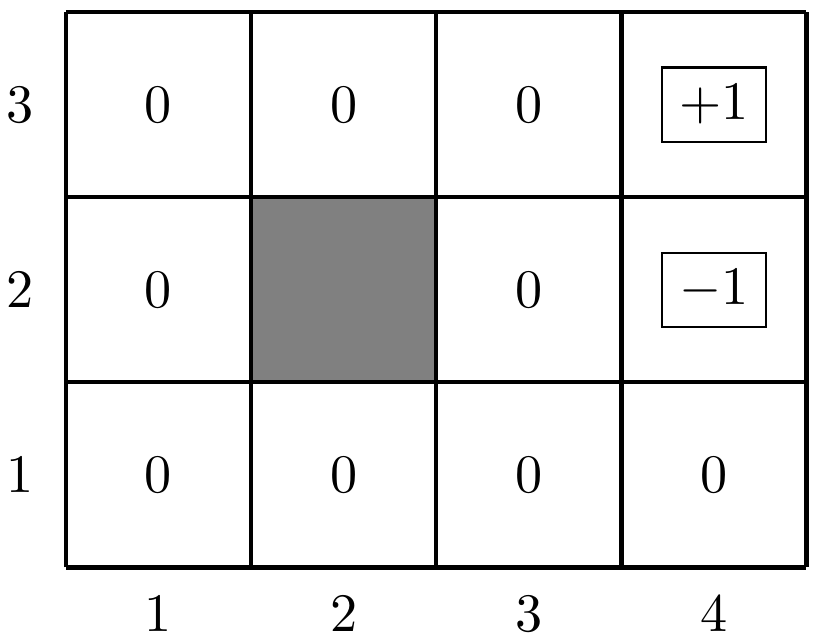

YOUR ANSWER HERE
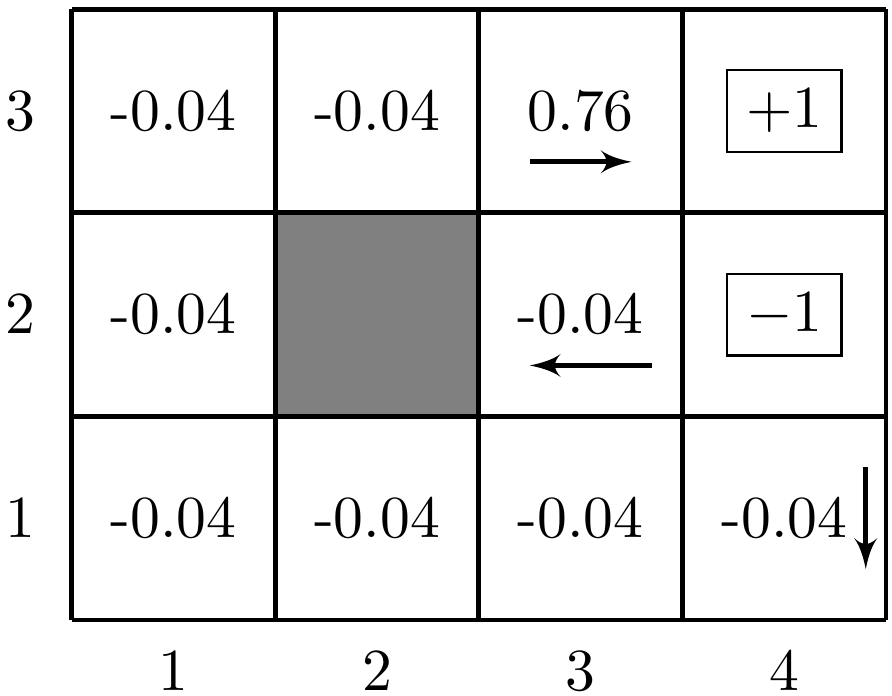

YOUR ANSWER HERE
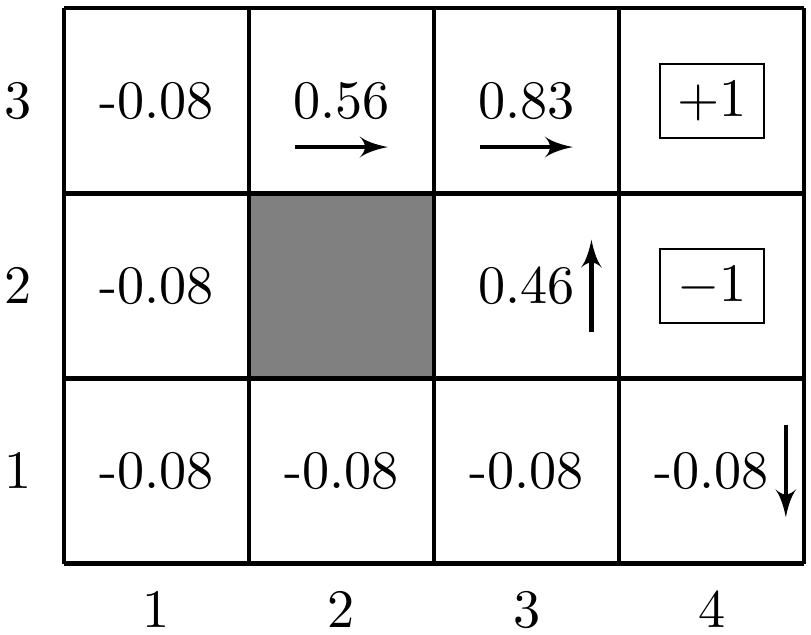

YOUR ANSWER HERE
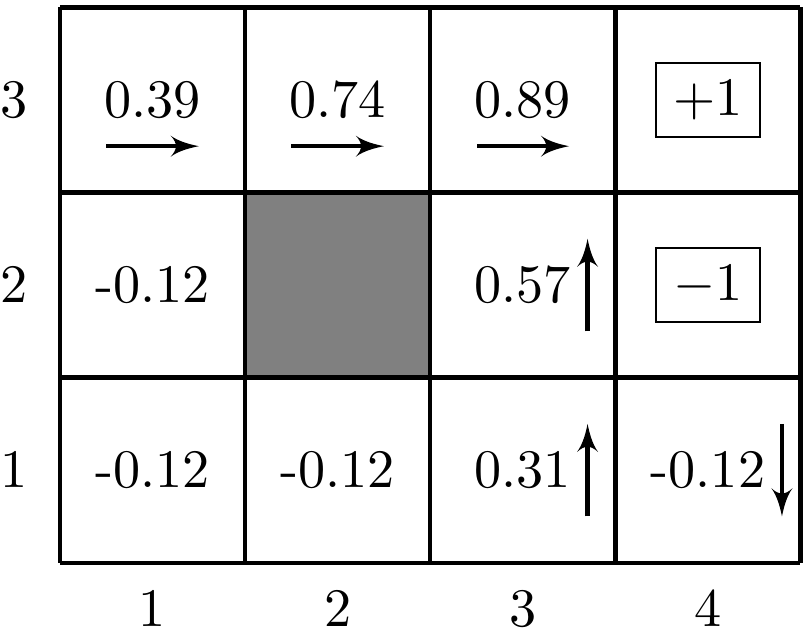

### 

Hat die Initialisierung der Utilities einen Einfluss auf die letztendlich entstehenden Werte?

YOUR ANSWER HERE

### 

Was verändert sich, wenn wir anstelle eines MDPs ein POMDP als Problemstellung betrachten? Können iterative Ansätze weiterhin angewandt werden? Skizzieren Sie ggf. eine Lösungsmöglichkeit und ihre Voraussetzungen.

YOUR ANSWER HERE

## Aufgabe: Lösung von MDPs in Python

Zur Lösung von MDPs haben Sie die beiden Algorithmen *Value Iteration* und *Policy Iteration* kennengelernt. Im Folgenden werden Sie beide Algorithmen in Python implementieren und anhand eines einfachen Beispielproblems vergleichen. 

Für die Modellierung des MDPs werden wir dabei das Python-Paket `gym` aus dem [OpenAI-Projekt](https://gym.openai.com) verwenden, welches Modellierungen für viele verschiedene Probleme aus dem Bereich des Reinforcement-Lernens bereitstellt. Das Paket können Sie wie gewohnt mit
```bash
conda install -c conda-forge gym
```

installieren.

Im Rahmen dieser Aufgabe werden Sie die [`Frozenlake8x8-v0`-Umgebung](https://gym.openai.com/envs/FrozenLake8x8-v0/) verwenden. Diese implementiert eine $8\times 8$-Welt, in welchem ein Agent über einen zugefrorenen See von der oberen linken in die untere rechte Ecke gelangen muss, ohne in ein Loch im Eis zu fallen. Ein Beispiel für die Weltrepräsenation ist in einer verkleinerten Variante im Folgenden dargestellt:

```
                          SFFF       (S: starting point, safe)
                          FHFH       (F: frozen surface, safe)
                          FFFH       (H: hole, fall to your doom)
                          HFFG       (G: goal, where the frisbee is located)
```

Der Agent kann dabei die Aktionen `right`, `left`, `up`, `down` ausführen. Aufgrund des Eises kann, ähnlich wie im Beispielproblem aus Aufgabe 1, der Agent jedoch auch in andere, unbeabsichtigte Richtungen "rutschen".

In [ ]:
import numpy as np
import gym
import time

# facy action display
action_mapping = {
    3: '\u2191', # UP
    2: '\u2192', # RIGHT
    1: '\u2193', # DOWN
    0: '\u2190' # LEFT
}

env = gym.make('FrozenLake8x8-v0')

world_size = (8,8)

def play_episodes(env, n_episodes, policy, random=False, print=True):
    """
    This function plays the given number of episodes given by following a policy or sampled randomly 
    from action_space.
    
    Parameters:
        env: openAI GYM object
        n_episodes: number of episodes to run
        policy: Policy to follow while playing an episode
        random: Flag for taking random actions. if True no policy would be followed and action will be taken randomly
        
    Return:
        wins: Total number of wins playing n_episodes
        total_reward: Total reward of n_episodes
        avg_reward: Average reward of n_episodes
    
    """
    # intialize wins and total reward
    wins = 0
    total_reward = 0
    
    # loop over number of episodes to play
    for episode in range(n_episodes):
        
        # flag to check if the game is finished
        terminated = False
        
        # reset the enviorment every time when playing a new episode
        state = env.reset()
        
        while not terminated:
            
            # check if the random flag is not true then follow the given policy other wise take random action
            if random:
                action = env.action_space.sample()
            else:
                action = policy[state]

            # take the next step
            next_state, reward,  terminated, info = env.step(action)
            
            # print optional
            if print:
                env.render()
            
            # accumalate total reward
            total_reward += reward
            
            # change the state
            state = next_state
            
            # if game is over with positive reward then add 1.0 in wins
            if terminated and reward == 1.0:
                wins += 1
                
    # calculate average reward
    average_reward = total_reward / n_episodes
    
    return wins, total_reward, average_reward


def do_one_step(env, state, V , discount_factor = 0.99):
    """
    Helper function to calculate the state-value function
    
    Arguments:
        env: openAI GYM Enviorment object
        state: state to consider
        V: Estimated Value for each state. Vector of length nS
        discount_factor: MDP discount factor
        
    Return:
        action_values: Expected value of each action in a state. Vector of length nA
    """
    # initialize vector of action values
    action_values = np.zeros(env.nA)
    
    # loop over the actions we can take
    for action in range(env.nA):
        # loop over the P_sa distribution.
        for probablity, next_state, reward, info in env.P[state][action]:
            #if we are in state s and take action a. then sum over all the possible states we can land into.
            action_values[action] += probablity * (reward + (discount_factor * V[next_state]))
            
    return action_values


def update_policy(env, policy, V, discount_factor):
    
    """
    Helper function to update (or create if empty) a policy based on given value function.
    
    Arguments:
        env: openAI GYM Enviorment object.
        policy: policy to update.
        V: Estimated Value for each state. Vector of length nS.
        discount_factor: MDP discount factor.
    Return:
        policy: Policy based on the given state-Value function 'V'.
    """
    
    for state in range(env.nS):
        # for a given state compute state-action value.
        action_values = do_one_step(env, state, V, discount_factor)
        
        # choose the action which maximizes the state-action value.
        policy[state] =  np.argmax(action_values)
        
    return policy


def print_policy(policy):
    policy = policy.reshape(world_size)
    for i in range(world_size[0]):
        print(' '.join([action_mapping[int(action)] for action in policy[i, :]]))

In [ ]:
# Test code
n_episode = 1
opt_policy = None
print_ = True
wins, total_reward, avg_reward = play_episodes(env, n_episode, opt_policy, random =True, print=print_)

print(f'Total wins with random walk: {wins}/{n_episode}')
print(f"Average rewards with random walk: {avg_reward}")

### 

Vervollständigen Sie die Funktion `value_iteration` indem Sie den Algorithmus analog zur Vorlesung implementieren. Geben Sie die Laufzeit, die Anzahl nötiger Iterationen bis zur Konvergenz sowie die resultierende Policy aus. Evaluieren Sie die Performance Ihrer Policy mit der Funktion `play_episodes`.

In [ ]:
def value_iteration(env, discount_factor = 0.999, max_iterations = 1000):
    """
    Algorithm to solve MPD.
    
    Arguments:
        env: openAI GYM Enviorment object.
        discount_factor: MDP discount factor.
        max_iteration: Maximum No. of iterations to run.
        
    Return:
        V: Optimal state-Value function. Vector of lenth nS.
        optimal_policy: Optimal policy. Vector of length nS.
    
    """
    # intialize value fucntion
    V = np.zeros(env.nS)
    

    
    #TODO: INSERT YOUR CODE HERE
    

    # intialize optimal policy
    optimal_policy = np.zeros(env.nS, dtype = 'int8')       
        
    # update the optimal polciy according to optimal value function 'V'
    optimal_policy = update_policy(env, optimal_policy, V, discount_factor)
    
    return V, optimal_policy

In [ ]:
#TODO: INSERT YOUR CODE HERE


### 
Vervollständigen Sie auch die Funktion `policy_iteration`. Bestimmen Sie erneut Laufzeit und nötige Iterationen und evaluieren Sie Ihre Policy. Vergleichen Sie die Ergebnisse mit denen aus dem vorherigen Aufgabenteil. Geben Sie Ihre Beobachtungen an.

In [ ]:
def policy_eval(env, policy, V, discount_factor):
    """
    Helper function to evaluate a policy.
    
    Arguments:
        env: openAI GYM Enviorment object.
        policy: policy to evaluate.
        V: Estimated Value for each state. Vector of length nS.
        discount_factor: MDP discount factor.
    Return:
        policy_value: Estimated value of each state following a given policy and state-value 'V'. 
        
    """
    policy_value = np.zeros(env.nS)
    for state, action in enumerate(policy):
        for probablity, next_state, reward, info in env.P[state][action]:
            policy_value[state] += probablity * (reward + (discount_factor * V[next_state]))
            
    return policy_value


def policy_iteration(env, discount_factor = 0.999, max_iterations = 1000):
    """
    Algorithm to solve MDP.
    
    Arguments:
        env: openAI GYM Enviorment object.
        discount_factor: MDP discount factor.
        max_iteration: Maximum No.  of iterations to run.
        
    Return:
        V: Optimal state-Value function. Vector of lenth nS.
        new_policy: Optimal policy. Vector of length nS.
    
    """
    # intialize the state-Value function
    V = np.zeros(env.nS)
    
    # intialize a random policy
    policy = np.random.randint(0, 4, env.nS)
    
    #TODO: INSERT YOUR CODE HERE
    
    
    return V, policy

In [ ]:
#TODO: INSERT YOUR CODE HERE
